## Short training project - small-molecules
Data Acquisition from Chembl

1. Import necessary libraries

In [1]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

2. Acquire data for the relevant molecular target

In [2]:
def chembl_query(uniprot_id, organism, target_type):
    
    #initialize API endpoints
    targets_api =new_client.target
    compounds_api=new_client.molecule
    bioactivities_api = new_client.activity
    
    
    #Query for targets based on their uniprot ID
    targets = targets_api.get(target_components__accession=uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")
    
    #Convert targets to a DataFrame
    targets_df = pd.DataFrame(targets)
    
    #Filter DataFrame to organism
    output_df = targets_df[(targets_df['organism'] == organism) & (targets_df['target_type']== target_type)]
    
    target_chembl_ids = output_df['target_chembl_id'].tolist()
    
    biactivities = bioactivities_api.filter(target_chembl_id__in=target_chembl_ids, type = 'IC50', relation = '=', assay_type = 'B'). only(
        'activity_id',
        'assay_chembl_id',
        'assay_description',
        'assay_type',
        'molecule_chembl_id',
        'canonical_smiles'
        'type',
        'standard_units',
        'relation',
        'standard_value',
        'target_chembl_id',
        'target_organism')
    
    bioactivities_df = pd.DataFrame(biactivities)
    
    return bioactivities_df

In [3]:
df = chembl_query(uniprot_id = 'P14416', organism = 'Homo sapiens', target_type = 'SINGLE PROTEIN')

3. Perform simple exploratory data analysis

In [4]:
df

,activity_id,assay_chembl_id,assay_description,assay_type,canonical_smiles,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,nM,9800.0
1,33282,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,CHEMBL292943,=,nM,50.0,CHEMBL217,Homo sapiens,IC50,nM,50.0
2,38258,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,CHEMBL61682,=,nM,25.0,CHEMBL217,Homo sapiens,IC50,nM,25.0
3,39387,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,CHEMBL64487,=,nM,360.0,CHEMBL217,Homo sapiens,IC50,nM,360.0
4,39391,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,CHEMBL64597,=,nM,300.0,CHEMBL217,Homo sapiens,IC50,nM,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,24421256,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,NCCCCN(C[C@H]1Cc2cccnc2CN1)[C@H]1CCCc2cccnc21,CHEMBL5076569,=,nM,10000.0,CHEMBL217,Homo sapiens,IC50,uM,10.0
334,24421261,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,c1cnc2c(c1)CN[C@@H](CN(CCCC1CCNCC1)[C@H]1CCCc3...,CHEMBL5081505,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,uM,9.8
335,24421263,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21,CHEMBL518924,=,nM,4100.0,CHEMBL217,Homo sapiens,IC50,uM,4.1
336,24749333,CHEMBL5120437,Inhibition of dopamine D2 receptor (unknown or...,B,Cc1c(C#Cc2ccc(CN3CCC(CO)CC3)cc2)cc(C(F)F)c2cn(...,CHEMBL5177023,=,nM,1000.0,CHEMBL217,Homo sapiens,IC50,uM,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_id         338 non-null    int64 
 1   assay_chembl_id     338 non-null    object
 2   assay_description   338 non-null    object
 3   assay_type          338 non-null    object
 4   canonical_smiles    338 non-null    object
 5   molecule_chembl_id  338 non-null    object
 6   relation            338 non-null    object
 7   standard_units      338 non-null    object
 8   standard_value      338 non-null    object
 9   target_chembl_id    338 non-null    object
 10  target_organism     338 non-null    object
 11  type                338 non-null    object
 12  units               338 non-null    object
 13  value               338 non-null    object
dtypes: int64(1), object(13)
memory usage: 37.1+ KB


In [6]:
df['standard_value'] = df['standard_value'].astype(float)

In [7]:
df['assay_description'].value_counts()

DRUGMATRIX: Dopamine D2L radioligand binding (ligand: [3H] Spiperone)                                                                                                                                  59
Binding affinity to dopamine receptor D2 cloned from human, using [3H]- YM09151 as competitive ligand                                                                                                  32
Binding affinity to cloned human Dopamine receptor D2 expressed in A9L cells by [3H]spiperone displacement.                                                                                            17
Inhibition of human dopamine D2L receptor expressed in intact CHO FlpIn cells assessed as inhibition of receptor-mediated mediated ERK1/2 phosphorylation by Alpha-Screen plate-based assay            16
Antagonist activity against human D2LR expressed in CHOK1 cells assessed as inhibition of pergolide-induced beta-arrestin translocation by beta-galactosidase based beta-arrestin recruitment as

In [8]:
df['standard_units'].unique()

array(['nM'], dtype=object)

In [9]:
df.isna().sum()

activity_id           0
assay_chembl_id       0
assay_description     0
assay_type            0
canonical_smiles      0
molecule_chembl_id    0
relation              0
standard_units        0
standard_value        0
target_chembl_id      0
target_organism       0
type                  0
units                 0
value                 0
dtype: int64

In [10]:
df.drop_duplicates("molecule_chembl_id", keep='first', inplace=True)
df

,activity_id,assay_chembl_id,assay_description,assay_type,canonical_smiles,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,nM,9800.0
1,33282,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,CHEMBL292943,=,nM,50.0,CHEMBL217,Homo sapiens,IC50,nM,50.0
2,38258,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,CHEMBL61682,=,nM,25.0,CHEMBL217,Homo sapiens,IC50,nM,25.0
3,39387,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,CHEMBL64487,=,nM,360.0,CHEMBL217,Homo sapiens,IC50,nM,360.0
4,39391,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,CHEMBL64597,=,nM,300.0,CHEMBL217,Homo sapiens,IC50,nM,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,24421256,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,NCCCCN(C[C@H]1Cc2cccnc2CN1)[C@H]1CCCc2cccnc21,CHEMBL5076569,=,nM,10000.0,CHEMBL217,Homo sapiens,IC50,uM,10.0
334,24421261,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,c1cnc2c(c1)CN[C@@H](CN(CCCC1CCNCC1)[C@H]1CCCc3...,CHEMBL5081505,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,uM,9.8
335,24421263,CHEMBL5048805,Inhibition of dopamine D2 receptor (unknown or...,B,NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21,CHEMBL518924,=,nM,4100.0,CHEMBL217,Homo sapiens,IC50,uM,4.1
336,24749333,CHEMBL5120437,Inhibition of dopamine D2 receptor (unknown or...,B,Cc1c(C#Cc2ccc(CN3CCC(CO)CC3)cc2)cc(C(F)F)c2cn(...,CHEMBL5177023,=,nM,1000.0,CHEMBL217,Homo sapiens,IC50,uM,1.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\anaconda3\envs\my-rdkit-env\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
df['assay_type'].unique()

array(['B'], dtype=object)

In [13]:
df['target_chembl_id'].unique()

array(['CHEMBL217'], dtype=object)

In [14]:
#Clean DataFrame

df_trimmed = df.drop(columns = ['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type', 'relation', 'target_chembl_id', 'target_organism', 'type', 'units', 'value'])

In [15]:
def convert_activity_to_pactivity(activity_value):
    pactivity_value = 9 - math.log10(activity_value)
    return pactivity_value

In [16]:
df_trimmed["pIC50"] = df.apply(lambda x: convert_activity_to_pactivity(x.standard_value), axis=1)

<AxesSubplot:ylabel='Frequency'>

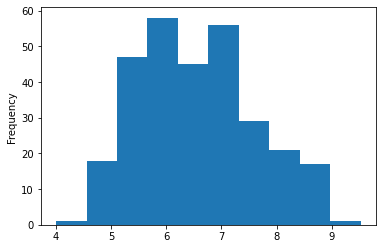

In [17]:
df_trimmed['pIC50'].plot(kind='hist')

In [18]:
#Add molecule column

PandasTools.AddMoleculeColumnToFrame(df_trimmed, smilesCol="canonical_smiles")
df_trimmed.sort_values(by='pIC50', ascending=False, inplace=True)
df_trimmed.reset_index(drop=True, inplace=True)

,canonical_smiles,molecule_chembl_id,standard_units,standard_value,pIC50,ROMol
0,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,CHEMBL567,nM,0.300,9.522879,
1,CC(C)(C)[C@]1(O)CCN2C[C@H]3c4ccccc4CCc4cccc(c4...,CHEMBL8514,nM,1.100,8.958607,
2,CC(C)(C)[C@]1(O)CCN2C[C@@H]3c4ccccc4CCc4cccc(c...,CHEMBL3885419,nM,1.100,8.958607,
3,O=C(CCCN1CCC2(CC1)C(=O)NCN2c1ccccc1)c1ccc(F)cc1,CHEMBL267930,nM,1.270,8.896196,
4,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,CHEMBL1255837,nM,1.474,8.831503,
...,...,...,...,...,...,...
288,Cc1c(C)c2c(c(C)c1O)CCC(C)(CN1CCN(c3cc(N4CCCC4)...,CHEMBL141343,nM,16760.000,4.775726,
289,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,CHEMBL633,nM,19952.000,4.700014,
290,CCN(CC)C(=S)SSC(=S)N(CC)CC,CHEMBL964,nM,23018.000,4.637932,
291,CNC[C@@H]1OCCc2ccsc21,CHEMBL4650337,nM,24000.000,4.619789,

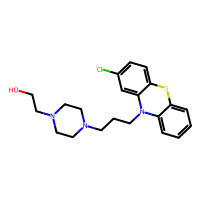
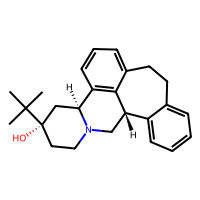
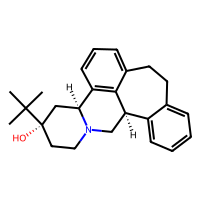
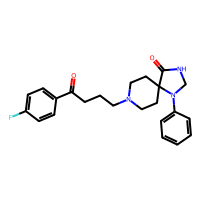
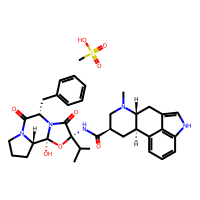
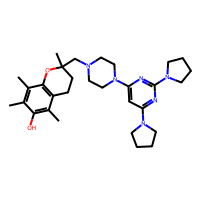
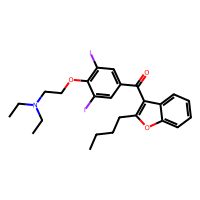
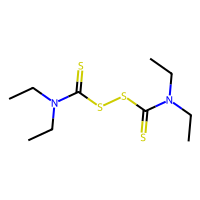
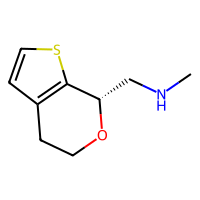
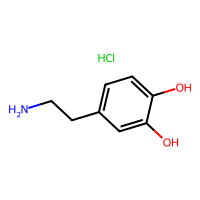

In [19]:
df_trimmed

In [21]:
df_trimmed.to_csv('D:\\MachineLearning\\table_1.csv')